# Importing the required Libraries

In [78]:
#print many statements at same time using the below command
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity="all"

In [79]:
import pandas as pd
from matplotlib import pyplot as plt
import collections
import warnings
import pandas_profiling
import numpy as np
import seaborn as sns
import sklearn
from sklearn import metrics
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')
%matplotlib inline
import graphviz
from sklearn.preprocessing import MinMaxScaler


# Reading the CSV file from the machine

In [80]:
wine= pd.read_csv("D:\Module3_RP\Session1\winequality-white.csv", sep=';')

In [81]:
wine.columns

Index(['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [82]:
wine.columns=['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality']

In [83]:
wine.info()
wine.head()
wine.shape
wine.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4898 entries, 0 to 4897
Data columns (total 12 columns):
fixed_acidity           4898 non-null float64
volatile_acidity        4898 non-null float64
citric_acid             4898 non-null float64
residual_sugar          4898 non-null float64
chlorides               4898 non-null float64
free_sulfur_dioxide     4898 non-null float64
total_sulfur_dioxide    4898 non-null float64
density                 4898 non-null float64
pH                      4898 non-null float64
sulphates               4898 non-null float64
alcohol                 4898 non-null float64
quality                 4898 non-null int64
dtypes: float64(11), int64(1)
memory usage: 459.3 KB


,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol,quality
0,7.0,0.27,0.36,20.7,0.045,45.0,170.0,1.0010,3.00,0.45,8.8,6
1,6.3,0.30,0.34,1.6,0.049,14.0,132.0,0.9940,3.30,0.49,9.5,6
2,8.1,0.28,0.40,6.9,0.050,30.0,97.0,0.9951,3.26,0.44,10.1,6
3,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6
4,7.2,0.23,0.32,8.5,0.058,47.0,186.0,0.9956,3.19,0.40,9.9,6


(4898, 12)

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol', 'quality'],
      dtype='object')

In [84]:
x=wine.drop(['quality'],axis=1,inplace=False) #          

In [85]:
x.shape


(4898, 11)

In [86]:
x.columns

Index(['fixed_acidity', 'volatile_acidity', 'citric_acid', 'residual_sugar',
       'chlorides', 'free_sulfur_dioxide', 'total_sulfur_dioxide', 'density',
       'pH', 'sulphates', 'alcohol'],
      dtype='object')

In [88]:
x

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
1,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
2,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
3,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
4,7.2,0.230,0.32,8.50,0.058,47.0,186.0,0.99560,3.19,0.40,9.900000
5,8.1,0.280,0.40,6.90,0.050,30.0,97.0,0.99510,3.26,0.44,10.100000
6,6.2,0.320,0.16,7.00,0.045,30.0,136.0,0.99490,3.18,0.47,9.600000
7,7.0,0.270,0.36,20.70,0.045,45.0,170.0,1.00100,3.00,0.45,8.800000
8,6.3,0.300,0.34,1.60,0.049,14.0,132.0,0.99400,3.30,0.49,9.500000
9,8.1,0.220,0.43,1.50,0.044,28.0,129.0,0.99380,3.22,0.45,11.000000


In [89]:
scld=MinMaxScaler(feature_range=(0,1))

In [90]:
wine_scld=scld.fit_transform(x)

In [91]:
wine_x = pd.DataFrame(wine_scld)

In [93]:
wine_x.head()

,0,1,2,3,4,5,6,7,8,9,10
0,0.307692,0.186275,0.216867,0.308282,0.106825,0.149826,0.373550,0.267785,0.254545,0.267442,0.129032
1,0.240385,0.215686,0.204819,0.015337,0.118694,0.041812,0.285383,0.132832,0.527273,0.313953,0.241935
2,0.413462,0.196078,0.240964,0.096626,0.121662,0.097561,0.204176,0.154039,0.490909,0.255814,0.338710
3,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452
4,0.326923,0.147059,0.192771,0.121166,0.145401,0.156794,0.410673,0.163678,0.427273,0.209302,0.306452


In [94]:
wine_x.describe()


,0,1,2,3,4,5,6,7,8,9,10
count,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000,4898.000000
mean,0.293730,0.194354,0.201320,0.088825,0.109117,0.116056,0.300141,0.133360,0.425697,0.313775,0.405527
std,0.081141,0.098818,0.072903,0.077792,0.064831,0.059258,0.098603,0.057662,0.137273,0.132704,0.198487
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.240385,0.127451,0.162651,0.016871,0.080119,0.073171,0.229698,0.088924,0.336364,0.220930,0.241935
50%,0.288462,0.176471,0.192771,0.070552,0.100890,0.111498,0.290023,0.127820,0.418182,0.290698,0.387097
75%,0.336538,0.235294,0.234940,0.142638,0.121662,0.153310,0.366589,0.173318,0.509091,0.383721,0.548387
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [95]:
# fit PCA Model, the number of components will be as same as number of variables.
from sklearn.decomposition import PCA
pca=PCA().fit(wine_x)

In [96]:
pca

PCA(copy=True, iterated_power='auto', n_components=None, random_state=None,
  svd_solver='auto', tol=0.0, whiten=False)

In [97]:
str(pca.explained_variance_ratio_) # first component explains 36.2% of variance , second 19.2%

'[0.38165992 0.17846312 0.12895247 0.08592807 0.06842803 0.04595895\n 0.03924179 0.0332141  0.02432526 0.01308555 0.00074274]'

In [98]:
str(pca.explained_variance_ratio_.sum())

'1.0'

In [100]:
pca=PCA(5).fit(wine_x)

In [101]:
str(pca.explained_variance_ratio_.sum())

'0.843431617935084'

Text(0.5, 0, 'Number of components')

Text(0, 0.5, 'Cumulative explaine variances')

Text(10, 88, 'Selected Components')

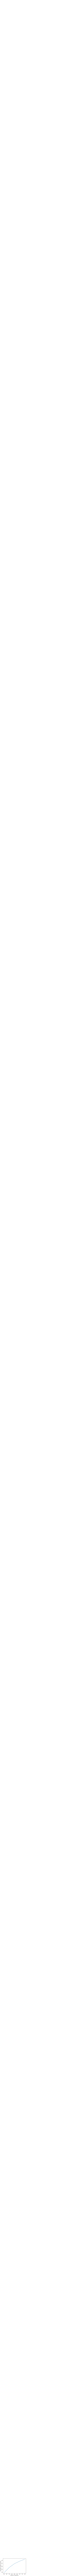

In [102]:
#plotting relations between components and variance

plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of components')
plt.ylabel('Cumulative explaine variances')
plt.annotate("Selected Components",xy=(10,88))

In [103]:
#Kaiser Criteria(Eigen Values)
pca.explained_variance_

array([0.04745145, 0.02218817, 0.01603255, 0.01068336, 0.0085076 ])

In [104]:
#create dataframe of Components
pca_df=pd.DataFrame(pca.components_,columns=x.columns)

In [105]:
pca_df

,fixed_acidity,volatile_acidity,citric_acid,residual_sugar,chlorides,free_sulfur_dioxide,total_sulfur_dioxide,density,pH,sulphates,alcohol
0,-0.074462,0.022258,-0.046049,-0.201742,-0.114127,-0.093712,-0.257382,-0.224840,0.138936,-0.020928,0.890389
1,-0.231288,-0.043414,-0.062494,-0.045994,-0.000940,0.054183,0.132921,0.025827,0.773832,0.557302,-0.089032
2,0.235757,-0.014591,0.152693,0.023045,0.001588,0.020420,0.078420,0.012002,-0.492790,0.803830,0.157039
3,-0.045016,0.856555,-0.116405,0.195862,0.040789,0.110390,0.403794,0.081633,-0.001060,-0.031484,0.166790
4,0.115979,-0.417969,0.283697,0.222053,-0.087335,0.390023,0.620968,0.084317,0.077621,-0.184327,0.299336


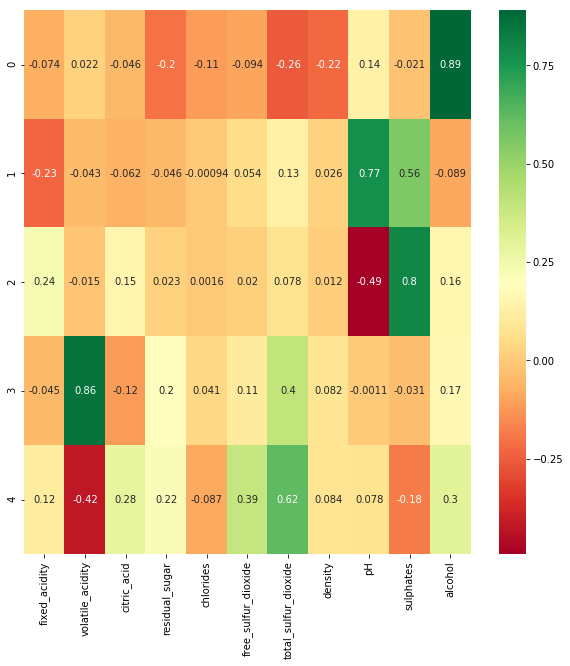

In [114]:
#heatmap of components
plt.figure(figsize=(10,10))
import seaborn as sns
sns.heatmap(pca_df, cmap = 'RdYlGn', annot = True)
plt.show();


In [107]:
wine_x.shape

(4898, 11)

In [108]:
wine_x_trnsf=pca.fit_transform(wine_x)
wine_x_trnsf=pd.DataFrame(wine_x_trnsf,columns=('P1','P2','P3','P4','P5'))

In [109]:
wine_x_trnsf.head()

,P1,P2,P3,P4,P5
0,-0.367228,-0.132530,0.022574,0.033398,0.040919
1,-0.102658,0.101833,-0.092314,-0.035333,-0.110548
2,-0.041145,-0.019729,-0.062420,-0.054980,-0.044267
3,-0.138690,-0.037112,-0.082437,0.005171,0.102010
4,-0.138690,-0.037112,-0.082437,0.005171,0.102010


In [111]:
wine_x_trnsf.shape

(4898, 5)